### Record

* This version has the following tests:
    * Use new dataset which keeps the ratio of impression to click
    * Reduce the size of training data by removing obs whose advertisers has few clicks

----
* numerical value for city id & region id 
---- LinAlgError: Singular matrix

keep only one of region id and city id 

* convert numerical variables to categorical variables based on the meaning

* 

### Question

1. which dataset is used to do the cross validation? test or train
2. how to deal with NAN in n_clicks? 

### Goal

4. bundle the region id

5. random forest

6. convert timestamp to see the effect of weekday

7. set NAN as a column 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots

In [2]:
pwd()

'/Users/jzw/Downloads/CAPSTONE/ipinyou.contest.dataset/data_exploration'

In [3]:
com_ad = pd.read_csv('final_training_testing_stratified.csv')
com_ad.drop(['Unnamed: 0'], axis=1, inplace=True)
com_ad.info()
com_ad.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532897 entries, 0 to 532896
Data columns (total 69 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Timestamp_bid                    532897 non-null  int64  
 1   User-Agent_bid                   532763 non-null  object 
 2   Region ID_bids_join_impressions  532897 non-null  int64  
 3   City ID                          532897 non-null  int64  
 4   Ad Exchange                      532897 non-null  int64  
 5   Ad Slot Width                    532897 non-null  int64  
 6   Ad Slot Height                   532897 non-null  int64  
 7   Ad Slot Visibility               532897 non-null  int64  
 8   Ad Slot Format                   532897 non-null  int64  
 9   Ad Slot Floor Price              532897 non-null  int64  
 10  Bidding Price                    532897 non-null  int64  
 11  Advertiser ID                    532897 non-null  int64  
 12  Us

,Timestamp_bid,User-Agent_bid,Region ID_bids_join_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,...,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,20130606000104044,mozilla/4.0 (compatible; msie 8.0; windows nt ...,80,80,1,300,250,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20130607000103558,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,106,107,2,728,90,0,0,162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130607000103600,mozilla/5.0 (windows nt 6.1) applewebkit/537.1...,94,95,1,300,250,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20130610000102963,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1...,275,275,2,120,600,0,0,250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20130608000103201,mozilla/4.0 (compatible; msie 6.0; windows nt ...,80,89,1,300,250,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### fillna with 0 to indicate if a specific user profile exists

In [4]:
# fillna with 0 to indicate if a specific user profile exists
com_ad[['10006','10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']] = com_ad[['10006','10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']].fillna(0)

com_ad[['10006','10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']]

,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,...,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532892,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# #columns in impression
# '''

# 'bidid', 'timestamp', 'logtype', 'ipinyouid', 'useragent', 
# 'ip', 'region', 'city', 'adexchange', 'domain', 'url', 
# 'urlid','slotid', 'slotwidth', 'slotheight', 'slotvisibility', 
# 'slotformat', 'slotprice','creative', 'bidprice', 'payprice', 
# 'keypage', 'advertiser', 'usertag'

# '''

### impression to click model

In [5]:
com_ad.shape

(532897, 69)

In [6]:
com_ad.columns

Index(['Timestamp_bid', 'User-Agent_bid', 'Region ID_bids_join_impressions',
       'City ID', 'Ad Exchange', 'Ad Slot Width', 'Ad Slot Height',
       'Ad Slot Visibility', 'Ad Slot Format', 'Ad Slot Floor Price',
       'Bidding Price', 'Advertiser ID', 'User Profile IDs_bid',
       'Timestamp_imp', 'User-Agent_imp', 'Log Type', 'Paying Price',
       'User Profile IDs_imp', 'n_impressions', 'Timestamp', 'User-Agent',
       'User Profile IDs', 'Region ID_clicks', 'n_clicks', 'has impression',
       'has click', '10006', '10024', '10031', '10048', '10052', '10057',
       '10059', '10063', '10067', '10074', '10075', '10076', '10077', '10079',
       '10083', '10093', '10102', '10110', '10111', '10684', '11092', '11278',
       '11379', '11423', '11512', '11576', '11632', '11680', '11724', '11944',
       '13042', '13403', '13496', '13678', '13776', '13800', '13866', '13874',
       '14273', '16593', '16617', '16661', '16706'],
      dtype='object')

#### Keep columns that are useful for model from imp to click

In [7]:
# have a dataset for model probability of click from impression
# user agent and user profile id
# 0304 only keep region id since it's highly related to the city id

ad_imp = com_ad[['City ID', 'Ad Exchange',
       'Ad Slot Width', 'Ad Slot Height', 'Ad Slot Visibility',
       'Ad Slot Format', 'Ad Slot Floor Price', 'Bidding Price',
       'Advertiser ID', 'Timestamp_imp','Log Type', 'Paying Price',
       'Region ID_clicks', 'n_clicks', 'has impression', 'has click', '10006',
       '10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']]

<AxesSubplot:>

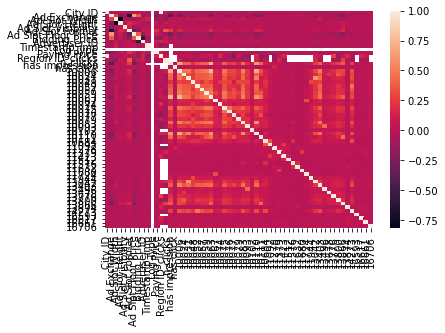

In [8]:
corr = ad_imp.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [9]:
# print top two correlations for each column 
for i in ad_imp.columns:
    print(corr[i].nlargest(2))

City ID             1.000000
Region ID_clicks    0.998997
Name: City ID, dtype: float64
Ad Exchange            1.000000
Ad Slot Floor Price    0.631783
Name: Ad Exchange, dtype: float64
Ad Slot Width    1.000000
Ad Exchange      0.283041
Name: Ad Slot Width, dtype: float64
Ad Slot Height    1.000000
Ad Slot Format    0.164827
Name: Ad Slot Height, dtype: float64
Ad Slot Visibility    1.000000
Ad Slot Format        0.126547
Name: Ad Slot Visibility, dtype: float64
Ad Slot Format    1.000000
n_clicks          0.380898
Name: Ad Slot Format, dtype: float64
Ad Slot Floor Price    1.000000
Ad Exchange            0.631783
Name: Ad Slot Floor Price, dtype: float64
Bidding Price    1.000000
Ad Exchange      0.371729
Name: Bidding Price, dtype: float64
Advertiser ID       1.0000
Region ID_clicks    0.1442
Name: Advertiser ID, dtype: float64
Timestamp_imp    1.000000
Ad Slot Width    0.120262
Name: Timestamp_imp, dtype: float64
Series([], Name: Log Type, dtype: float64)
Paying Price      1.000000

#### Remove city id because it's highly related to region id

In [10]:
ad_imp = ad_imp.drop(['City ID'], axis=1)
ad_imp.shape

(532897, 58)

In [11]:
ad_imp_summary = ad_imp.describe()
ad_imp_summary

,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID,Timestamp_imp,Log Type,...,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
count,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,1.219040e+05,121904.0,...,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000
mean,2.522065,568.784527,187.061158,1.334027,0.132724,47.082524,272.818004,2876.632674,2.013061e+16,1.0,...,0.004269,0.012259,0.024487,0.045125,0.000105,0.023308,0.000180,0.000340,0.000358,0.000377
std,0.693825,323.229139,107.900763,14.931340,0.446124,40.992372,29.850926,873.591274,1.997986e+09,0.0,...,0.065199,0.110076,0.154725,0.208003,0.010251,0.151055,0.013421,0.018427,0.018929,0.019418
min,1.000000,120.000000,60.000000,0.000000,0.000000,0.000000,227.000000,1458.000000,2.013061e+16,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,300.000000,90.000000,0.000000,0.000000,5.000000,241.000000,1458.000000,2.013061e+16,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,336.000000,250.000000,0.000000,0.000000,50.000000,300.000000,3386.000000,2.013061e+16,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1000.000000,250.000000,1.000000,0.000000,80.000000,300.000000,3427.000000,2.013061e+16,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1000.000000,600.000000,255.000000,5.000000,295.000000,300.000000,3476.000000,2.013061e+16,1.0,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# filter constant feature [std = 0]
ad_imp_summary.loc['std'][ad_imp_summary.loc['std'] == 0]

Log Type    0.0
Name: std, dtype: float64

In [13]:
# drop feature Log Type because it's a constant
ad_imp.drop(['Log Type'], axis=1, inplace=True)

#### filter data with `has impression` == 1

In [14]:
# filter has impression == 1 to get the suitable dataset
ad_imp2clk = ad_imp[ad_imp['has impression']==1]
print(ad_imp2clk.shape)
# drop the column has impression because now it is a constant
ad_imp2clk = ad_imp2clk.drop(['has impression'], axis=1)
print(ad_imp2clk.shape)

(121904, 57)
(121904, 56)


#### Convert some numerical variables to categorical variables

* Ad Exchange: the source of replacement of this as

* Ad Slot Visibility: relative location to the fold

* Ad Slot Format: popup / fixed

* Advertiser ID: advertiser field

* city/region ID


NOT include in the dataset

** Ad Slot ID: the location of current id

** Creative ID:

In [15]:
ad_imp2clk.columns

Index(['Ad Exchange', 'Ad Slot Width', 'Ad Slot Height', 'Ad Slot Visibility',
       'Ad Slot Format', 'Ad Slot Floor Price', 'Bidding Price',
       'Advertiser ID', 'Timestamp_imp', 'Paying Price', 'Region ID_clicks',
       'n_clicks', 'has click', '10006', '10024', '10031', '10048', '10052',
       '10057', '10059', '10063', '10067', '10074', '10075', '10076', '10077',
       '10079', '10083', '10093', '10102', '10110', '10111', '10684', '11092',
       '11278', '11379', '11423', '11512', '11576', '11632', '11680', '11724',
       '11944', '13042', '13403', '13496', '13678', '13776', '13800', '13866',
       '13874', '14273', '16593', '16617', '16661', '16706'],
      dtype='object')

In [16]:
# set ad exchange as object to get dummy variables
ad_imp2clk['Ad Exchange'] = ad_imp2clk['Ad Exchange'].astype('object')
# set ad slot visibility as object to get dummy variables
ad_imp2clk['Ad Slot Visibility'] = ad_imp2clk['Ad Slot Visibility'].astype('object')
# set ad slot format as object to get dummy variables
ad_imp2clk['Ad Slot Format'] = ad_imp2clk['Ad Slot Format'].astype('object')
# set advertiser id as object to get dummy variables
ad_imp2clk['Advertiser ID'] = ad_imp2clk['Advertiser ID'].astype('object')
# set region id as object to get dummy variables
ad_imp2clk['Region ID_clicks'] = ad_imp2clk['Region ID_clicks'].astype('object')
# # set hour as object to get dummy variables
# ad_imp2clk['Hour'] = ad_imp2clk['Hour'].astype('object')

In [17]:
# drop n_clicks because it has too many NAN
ad_imp2clk = ad_imp2clk.drop(['n_clicks'], axis=1)
print(ad_imp2clk.shape)

(121904, 55)


In [18]:
# convert region id into dummy variables
ad_imp2clk_enc = pd.get_dummies(ad_imp2clk, columns = ['Ad Exchange', 'Ad Slot Visibility','Ad Slot Format','Region ID_clicks','Advertiser ID'])
ad_imp2clk_enc.head()

,Ad Slot Width,Ad Slot Height,Ad Slot Floor Price,Bidding Price,Timestamp_imp,Paying Price,has click,10006,10024,10031,...,Region ID_clicks_276.0,Region ID_clicks_298.0,Region ID_clicks_308.0,Region ID_clicks_333.0,Region ID_clicks_374.0,Advertiser ID_1458,Advertiser ID_3358,Advertiser ID_3386,Advertiser ID_3427,Advertiser ID_3476
0,300,250,0,227,2.013061e+16,62.0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,728,90,162,238,2.013061e+16,182.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,300,250,0,227,2.013061e+16,95.0,0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,120,600,250,300,2.013061e+16,250.0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,300,250,0,227,2.013061e+16,234.0,0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
ad_imp2clk_enc.columns

Index(['Ad Slot Width', 'Ad Slot Height', 'Ad Slot Floor Price',
       'Bidding Price', 'Timestamp_imp', 'Paying Price', 'has click', '10006',
       '10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706', 'Ad Exchange_1', 'Ad Exchange_2', 'Ad Exchange_3',
       'Ad Slot Visibility_0', 'Ad Slot Visibility_1', 'Ad Slot Visibility_2',
       'Ad Slot Visibility_255', 'Ad Slot Format_0', 'Ad Slot Format_1',
       'Ad Slot Format_5', 'Region ID_clicks_0.0', 'Region ID_clicks_1.0',
       'Region ID_clicks_2.0', 'Region ID_clicks_3.0', 'Region ID_clicks_15.0',
       'Region ID_clicks_27.0', 'Region ID_clicks_40.0',
       'Region ID_cli

## Update

#### Number of each advertiser's clicks 

In [20]:
clk_only = ad_imp2clk[ad_imp2clk['has click']==1]
clk_only_gb = clk_only.groupby(['Advertiser ID']).size()
clk_only_gb

Advertiser ID
1458    25
3358     7
3386    24
3427    23
3476     8
dtype: int64

In [21]:
# remove observations 
ad_imp2clk_update = ad_imp2clk[(ad_imp2clk['Advertiser ID'] != 3358) & (ad_imp2clk['Advertiser ID'] != 3476)]

In [22]:
print(ad_imp2clk.shape)
print(ad_imp2clk_update.shape)

(121904, 55)
(84758, 55)


In [23]:
# update the ad_imp2clk_enc
ad_imp2clk_enc_update = pd.get_dummies(ad_imp2clk_update, columns = ['Ad Exchange', 'Ad Slot Visibility','Ad Slot Format','Region ID_clicks','Advertiser ID'])

In [24]:
print(ad_imp2clk_enc.shape)
print(ad_imp2clk_enc_update.shape)

(121904, 91)
(84758, 89)


   #### Prepare training and testing dataset based on encoded impression dataset

In [25]:
ad_imp2clk_enc_update.shape

(84758, 89)

In [26]:
# use earlier five days as training data
imp2clk_train = ad_imp2clk_enc_update[ad_imp2clk_enc_update['Timestamp_imp'] < 20130611000000000]
# use later two days as testing data
imp2clk_test = ad_imp2clk_enc_update[ad_imp2clk_enc_update['Timestamp_imp'] >= 20130611000000000]

In [27]:
# baseline model
train_clk = np.sum(imp2clk_train['has click']==1)
train_not_clk = np.sum(imp2clk_train['has click']==0)

print(pd.Series({'0': train_not_clk, '1': train_clk}))

# baseline model should predict not click for all observations in the test set

0    60307
1       46
dtype: int64


In [28]:
# baseline model prediction probability
baseline_clk_prob = train_clk / (train_clk + train_not_clk)
baseline_clk_prob

0.0007621824929995195

#### Fitting the logistic regression -Preparation

In [29]:
# filter all constant features in the impression training set
imp2clk_train_summary = imp2clk_train.describe()
imp2clk_train_summary.loc['std'][imp2clk_train_summary.loc['std'] == 0]

Region ID_clicks_1.0      0.0
Region ID_clicks_2.0      0.0
Region ID_clicks_94.0     0.0
Region ID_clicks_238.0    0.0
Region ID_clicks_333.0    0.0
Name: std, dtype: float64

In [30]:
imp2clk_train.columns

Index(['Ad Slot Width', 'Ad Slot Height', 'Ad Slot Floor Price',
       'Bidding Price', 'Timestamp_imp', 'Paying Price', 'has click', '10006',
       '10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706', 'Ad Exchange_1', 'Ad Exchange_2', 'Ad Exchange_3',
       'Ad Slot Visibility_0', 'Ad Slot Visibility_1', 'Ad Slot Visibility_2',
       'Ad Slot Visibility_255', 'Ad Slot Format_0', 'Ad Slot Format_1',
       'Ad Slot Format_5', 'Region ID_clicks_0.0', 'Region ID_clicks_1.0',
       'Region ID_clicks_2.0', 'Region ID_clicks_3.0', 'Region ID_clicks_15.0',
       'Region ID_clicks_27.0', 'Region ID_clicks_40.0',
       'Region ID_cli

In [31]:
# drop constant column 'Region ID_clicks_1.0', 'Region ID_clicks_2.0', 'Region ID_clicks_94.0', 'Region ID_clicks_238.0', 'Region ID_clicks_333.0'
imp2clk_train_update = imp2clk_train.drop(['Region ID_clicks_1.0', 'Region ID_clicks_2.0', 'Region ID_clicks_94.0', 'Region ID_clicks_238.0', 'Region ID_clicks_333.0'], axis=1)
# keep the same features in the imp2clk_test
imp2clk_test_update = imp2clk_test.drop(['Region ID_clicks_1.0', 'Region ID_clicks_2.0', 'Region ID_clicks_94.0', 'Region ID_clicks_238.0', 'Region ID_clicks_333.0'], axis=1)

In [32]:
# prepare training dataset
X1_train = imp2clk_train_update.drop('has click', axis=1)
y1_train = imp2clk_train_update[['has click']]

# prepare testing dataset
X1_test = imp2clk_test_update.drop('has click', axis=1)
y1_test = imp2clk_test_update[['has click']]


In [33]:
print(X1_train.shape)
print(X1_test.shape)

(60353, 83)
(24405, 83)


In [55]:
X1_train.columns

Index(['Ad Slot Width', 'Ad Slot Height', 'Ad Slot Floor Price',
       'Bidding Price', 'Timestamp_imp', 'Paying Price', '10006', '10024',
       '10031', '10048', '10052', '10057', '10059', '10063', '10067', '10074',
       '10075', '10076', '10077', '10079', '10083', '10093', '10102', '10110',
       '10111', '10684', '11092', '11278', '11379', '11423', '11512', '11576',
       '11632', '11680', '11724', '11944', '13042', '13403', '13496', '13678',
       '13776', '13800', '13866', '13874', '14273', '16593', '16617', '16661',
       '16706', 'Ad Exchange_1', 'Ad Exchange_2', 'Ad Exchange_3',
       'Ad Slot Visibility_0', 'Ad Slot Visibility_1', 'Ad Slot Visibility_2',
       'Ad Slot Visibility_255', 'Ad Slot Format_0', 'Ad Slot Format_1',
       'Ad Slot Format_5', 'Region ID_clicks_0.0', 'Region ID_clicks_3.0',
       'Region ID_clicks_15.0', 'Region ID_clicks_27.0',
       'Region ID_clicks_40.0', 'Region ID_clicks_55.0',
       'Region ID_clicks_65.0', 'Region ID_clicks_79.0',


### Logistic Regression

In [34]:
# logistic regression model from linear_model
from sklearn import linear_model
logregC1 = linear_model.LogisticRegression(max_iter=50000000,C=0.001, solver='saga',penalty='l2')
logregC1 = logregC1.fit(X1_train,y1_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
# predict the label/class
y1_logreg_label= logregC1.predict(X1_test)

# make probability predictions
y1_logreg_prob = logregC1.predict_proba(X1_test)[:,1]

#### Cross Entropy for logistic regression and baseline model

In [36]:
# cross entropy for logistic regression
# log_loss(y_true, y_pred)
# y_true: true labels
# y_pred: Predicted probabilities
from sklearn.metrics import log_loss
ce_logreg = log_loss(y1_test, y1_logreg_prob)
print('ce_logreg is: ', ce_logreg)

ce_logreg is:  0.008410198486271893


In [37]:
# cross entropy for baseline model
# y1_base_label = [0] * len(y1_test)
y1_base_prob = [baseline_clk_prob] * len(y1_test)
ce_baseline = log_loss(y1_test, y1_base_prob)
print('ce_baseline is: ', ce_baseline)

ce_baseline is:  0.008410193393035583


In [38]:
# relative ce
ce_logregRatio = ce_logreg / ce_baseline
print('relative ce of logistic regression: ', ce_logregRatio)

relative ce of logistic regression:  1.0000006056027575


#### ROC curve for logistic regression and baseline model

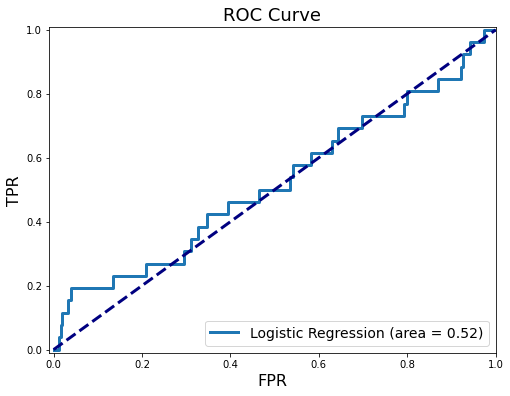

In [39]:
# y_scorendarray of shape (n_samples,)
# Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y1_test, y1_logreg_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

#### Using Cross Validation to choose C 

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer

grid_values = { 'C': [10000,100],
                'max_iter': [50000000],
                'solver': ['saga'],
                'penalty': ['l2']
}

logreg = linear_model.LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid=grid_values, scoring=make_scorer(log_loss,greater_is_better=False, needs_proba=True),cv=10)
logreg_cv.fit(X1_train, y1_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [10000, 100], 'max_iter': [50000000],
                         'penalty': ['l2'], 'solver': ['saga']},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [79]:
logloss = logreg_cv.cv_results_['mean_test_score']
c = logreg_cv.cv_results_['param_C'].data

pd.DataFrame({'C': c, 'Validation Logloss': logloss})

,C,Validation Logloss
0,10000,-0.006235
1,100,-0.006235


### Random Forest 


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)

<ipython-input-40-317dad7048b4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X1_train, y1_train)


RandomForestClassifier()

In [42]:
y1_rf_label = rf.predict(X1_test)
y1_rf_prob = rf.predict_proba(X1_test)[:,1]
ce_rf = log_loss(y1_test, y1_rf_prob)
print("ce_rf: ", ce_rf)
print("ce_rfRatio: ", ce_rf / ce_baseline)

ce_rf:  0.005658818910433486
ce_rfRatio:  0.672852412064568


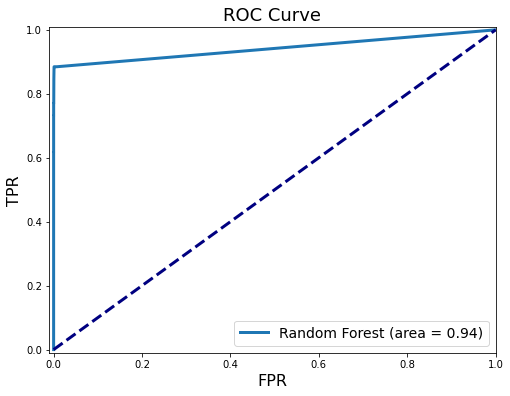

In [43]:
fpr3, tpr3, _ = roc_curve(y1_test, y1_rf_prob)
roc_auc3 = auc(fpr3, tpr3)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr3, tpr3, lw=3, label='Random Forest (area = {:0.2f})'.format(roc_auc3))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [ ]:
# importance score 
importance_score = pd.DataFrame({'Feature' : X1_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

### Gradient Boosting Tree



In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=100, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X1_train_enc, y1_train_enc)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


      Iter       Train Loss   Remaining Time 
         1           0.0125           11.24m
         2           0.0124           10.79m
         3           0.0123           10.49m
         4           0.0123           10.29m
         5           0.0122           10.07m
         6           0.0122            9.95m
         7           0.0121            9.90m
         8           0.0121            9.85m
         9           0.0121            9.85m
        10           0.0120           10.02m
        20           0.0118           10.13m
        30           0.0117           10.34m
        40           0.0116            9.94m
        50           0.0115            9.99m
        60           0.0115            9.95m
        70           0.0114            9.73m
        80           0.0114            9.60m
        90           0.0113            9.57m
       100           0.0113            9.46m
       200           0.0110            9.06m
       300           0.0109            8.71m
       40

GradientBoostingClassifier(learning_rate=0.001, max_depth=100, max_leaf_nodes=3,
                           min_samples_leaf=10, n_estimators=2000,
                           random_state=88, verbose=1)

In [90]:
# predict label
y1_gbc_label = gbr.predict(X1_test_enc)
# predict probability
y1_gbc_prob = gbr.predict_proba(X1_test_enc)[:,1]

In [91]:
ce_gbc = log_loss(y1_test_enc, y1_gbc_prob)
print ("ce_gbc is: ", ce_gbc)

ce_gbc is:  0.0053971161456864945


<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

(-0.01, 1.0)

(-0.01, 1.01)

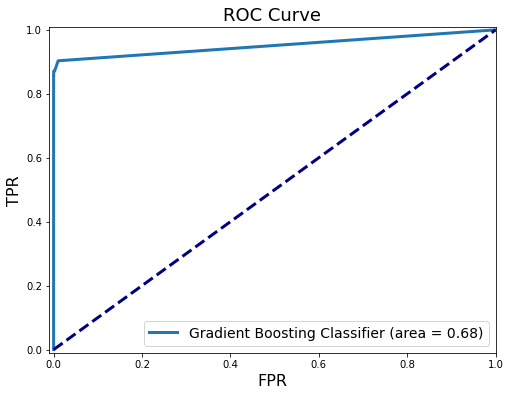

In [92]:
fpr4, tpr4, _ = roc_curve(y1_test_enc, y1_gbc_prob)
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr3, tpr3, lw=3, label='Gradient Boosting Classifier (area = {:0.2f})'.format(roc_auc4))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [54]:
# find suitable parameters
from sklearn.model_selection import GridSearchCV

grid_values = {'max_features': np.linspace(1,,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='neg_log_loss', cv=5)
rf_cv.fit(X1_train, y1_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='neg_log_loss')

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'max features')

Text(0, 0.5, 'CV CE')

(1.0, 19.0)

(0.3, 0.6)

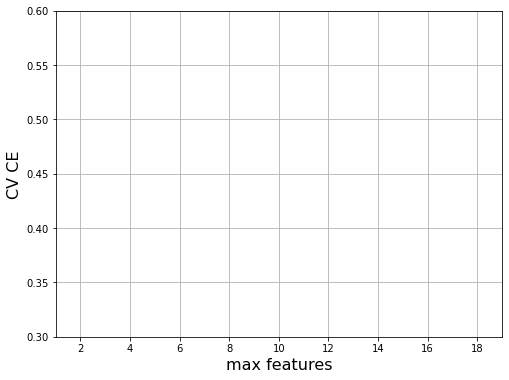

In [55]:
max_features = rf_cv.cv_results_['param_max_features'].data
ce_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV CE', fontsize=16)
plt.scatter(max_features, ce_scores, s=30)
plt.plot(max_features, ce_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])plt.ylim([0.3, 0.6])

In [90]:
# top 50 importance score
top50_is = importance_score.sort_values('Importance score',ascending=False).head(50)
top50_is

,Feature,Importance score
75,Region ID_clicks_216.0,11.6
5,Paying Price,10.3
27,11278,8.9
67,Region ID_clicks_94.0,7.7
8,10031,4.1
2,Ad Slot Floor Price,3.4
4,Timestamp_imp,3.3
0,Ad Slot Width,2.9
3,Bidding Price,2.8
59,Region ID_clicks_3.0,2.4


<Figure size 1440x720 with 0 Axes>

<BarContainer object of 20 artists>

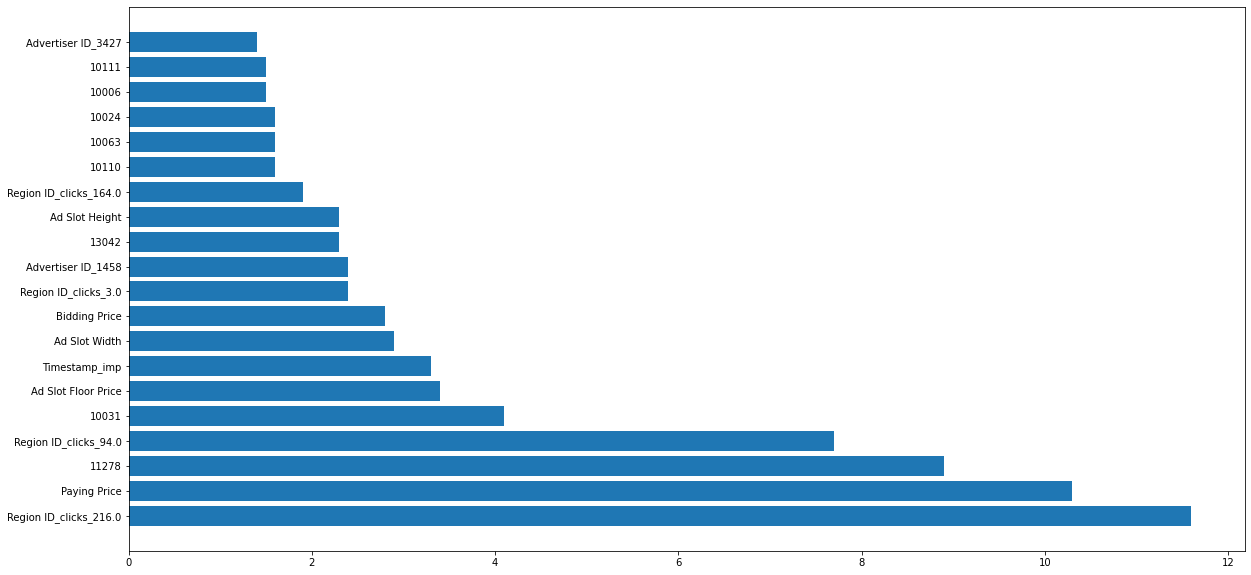

In [74]:
plt.figure(figsize=(20,10))
plt.barh(top20_is['Feature'],top20_is['Importance score'])

In [98]:
top20_is['Feature'].values

array(['Region ID_clicks_216.0', 'Paying Price', '11278',
       'Region ID_clicks_94.0', '10031', 'Ad Slot Floor Price',
       'Timestamp_imp', 'Ad Slot Width', 'Bidding Price',
       'Region ID_clicks_3.0', 'Advertiser ID_1458', '13042',
       'Ad Slot Height', 'Region ID_clicks_164.0', '10110', '10063',
       '10024', '10006', '10111', 'Advertiser ID_3427'], dtype=object)

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 20 artists>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)


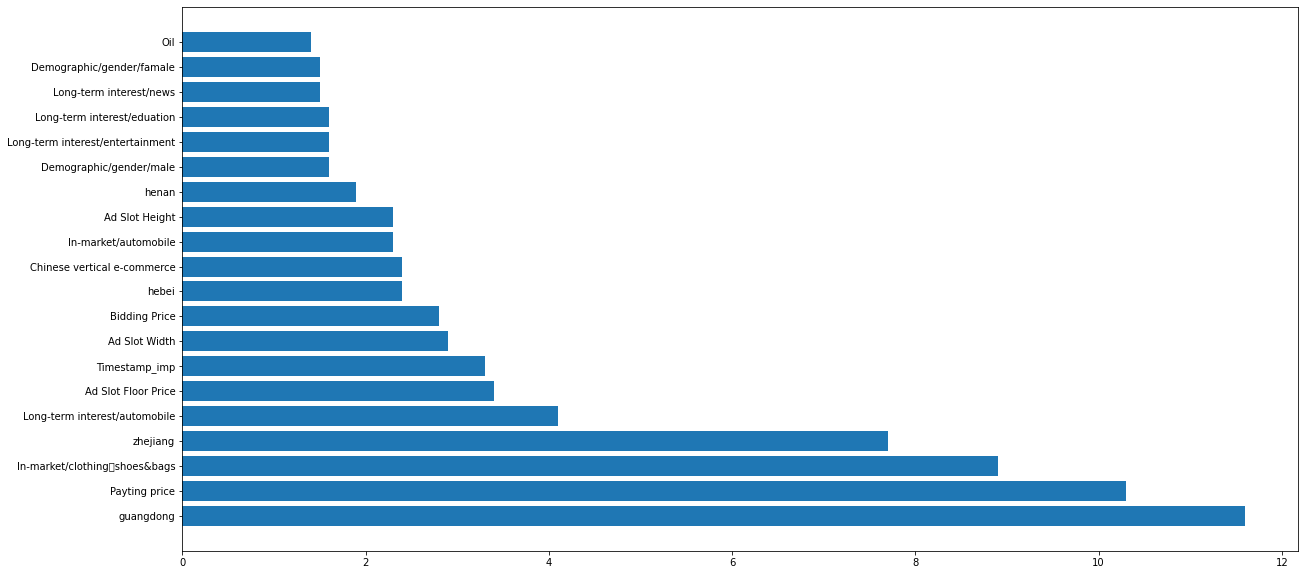

In [99]:
top20_map = {'Region ID_clicks_216.0':'guangdong','Paying Price':'Payting price', '11278':'In-market/clothing、shoes&bags',
       'Region ID_clicks_94.0':'zhejiang', '10031':'Long-term interest/automobile', 'Ad Slot Floor Price':'Ad Slot Floor Price',
       'Timestamp_imp':'Timestamp_imp', 'Ad Slot Width':'Ad Slot Width', 'Bidding Price':'Bidding Price',
       'Region ID_clicks_3.0':'hebei', 'Advertiser ID_1458':'Chinese vertical e-commerce', '13042':'In-market/automobile',
       'Ad Slot Height': 'Ad Slot Height', 'Region ID_clicks_164.0':'henan', '10110':'Demographic/gender/male', '10063':'Long-term interest/entertainment',
       '10024':'Long-term interest/eduation', '10006':'Long-term interest/news', '10111':'Demographic/gender/famale', 
       'Advertiser ID_3427':'Oil'}
top20_is['Feature'] = top20_is['Feature'].map(top20_map)
plt.figure(figsize=(20,10))
plt.barh(top20_is['Feature'],top20_is['Importance score'])

In [78]:
top50_is['Feature']

75    Region ID_clicks_216.0
5               Paying Price
27                     11278
67     Region ID_clicks_94.0
8                      10031
2        Ad Slot Floor Price
4              Timestamp_imp
0              Ad Slot Width
3              Bidding Price
59      Region ID_clicks_3.0
88        Advertiser ID_1458
36                     13042
1             Ad Slot Height
72    Region ID_clicks_164.0
23                     10110
13                     10063
7                      10024
6                      10006
24                     10111
91        Advertiser ID_3427
10                     10052
25                     10684
41                     13800
44                     14273
16                     10075
90        Advertiser ID_3386
20                     10083
11                     10057
37                     13403
89        Advertiser ID_3358
49      Ad Slot Visibility_0
12                     10059
42                     13866
50      Ad Slot Visibility_1
18            

In [80]:
top50_is['Feature'].values

array(['Region ID_clicks_216.0', 'Paying Price', '11278',
       'Region ID_clicks_94.0', '10031', 'Ad Slot Floor Price',
       'Timestamp_imp', 'Ad Slot Width', 'Bidding Price',
       'Region ID_clicks_3.0', 'Advertiser ID_1458', '13042',
       'Ad Slot Height', 'Region ID_clicks_164.0', '10110', '10063',
       '10024', '10006', '10111', 'Advertiser ID_3427', '10052', '10684',
       '13800', '14273', '10075', 'Advertiser ID_3386', '10083', '10057',
       '13403', 'Advertiser ID_3358', 'Ad Slot Visibility_0', '10059',
       '13866', 'Ad Slot Visibility_1', '10077', 'Ad Slot Visibility_2',
       'Region ID_clicks_238.0', '13776', '10048',
       'Region ID_clicks_333.0', 'Region ID_clicks_1.0',
       'Region ID_clicks_146.0', 'Ad Slot Format_1', 'Ad Slot Format_0',
       'Ad Slot Format_5', 'Advertiser ID_3476', '10076', '10093',
       '10067', '16593'], dtype=object)

In [86]:
 top50_map = {'Region ID_clicks_216.0':'guangdong','Paying Price':'Payting price', '11278':'In-market/clothing、shoes&bags',
       'Region ID_clicks_94.0':'zhejiang', '10031':'Long-term interest/automobile', 'Ad Slot Floor Price':'Ad Slot Floor Price',
       'Timestamp_imp':'Timestamp_imp', 'Ad Slot Width':'Ad Slot Width', 'Bidding Price':'Bidding Price',
       'Region ID_clicks_3.0':'hebei', 'Advertiser ID_1458':'Chinese vertical e-commerce', '13042':'In-market/automobile',
       'Ad Slot Height': 'Ad Slot Height', 'Region ID_clicks_164.0':'henan', '10110':'Demographic/gender/male', '10063':'Long-term interest/entertainment',
       '10024':'Long-term interest/eduation', '10006':'Long-term interest/news', '10111':'Demographic/gender/famale', 
       'Advertiser ID_3427':'Oil', '10052':'Long-term interest/IT', '10684':'In-market/3c product',
       '13800':'Long-term interest/art&photography&design', '14273':'Long-term interest/3c', '10075':'Long-term interest/health', 
       'Advertiser ID_3386':'International e-commerce', '10083':'Long-term interest/sports', '10057':'Long-term interest/electronic game',
       '13403':'In-market/finance', 'Advertiser ID_3358':'Software', 'Ad Slot Visibility_0':'Ad Slot Visibility_0', '10059':'Long-term interest/fashion',
       '13866':'Long-term interest/online literature', 'Ad Slot Visibility_1':'above the fold', '10077':'Long-term interest/divine', 'Ad Slot Visibility_2':'below the fold',
       'Region ID_clicks_238.0':'guangxi', '13776':'In-market/service', '10048':'Long-term interest/real estate',
       'Region ID_clicks_333.0':'shannxi', 'Region ID_clicks_1.0':'beijing',
       'Region ID_clicks_146.0':'shandong', 'Ad Slot Format_1':'fixed slot format', 'Ad Slot Format_0':'Ad Slot Format_0',
       'Ad Slot Format_5':'Ad Slot Format_5', 'Advertiser ID_3476':'Tire', '10076':'Long-term interest/food', '10093':'Long-term interest/travel&outdoors',
       '10067':'Long-term interest/luxury', '16593':'In-market/book'}

In [91]:
top50_is['Feature'] = top50_is['Feature'].map(top50_map)

In [92]:
top50_is

,Feature,Importance score
75,guangdong,11.6
5,Payting price,10.3
27,In-market/clothing、shoes&bags,8.9
67,zhejiang,7.7
8,Long-term interest/automobile,4.1
2,Ad Slot Floor Price,3.4
4,Timestamp_imp,3.3
0,Ad Slot Width,2.9
3,Bidding Price,2.8
59,hebei,2.4


<Figure size 1440x720 with 0 Axes>

<BarContainer object of 50 artists>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)


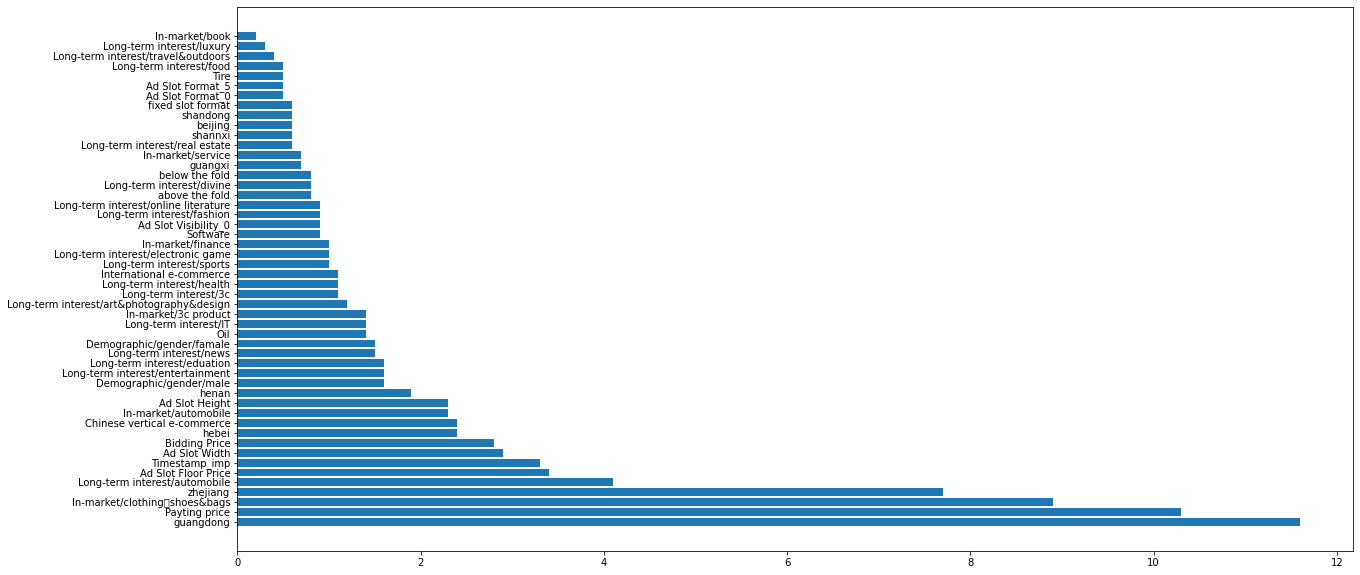

In [93]:
plt.figure(figsize=(20,10))
plt.barh(top50_is['Feature'],top50_is['Importance score'])

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 93 artists>

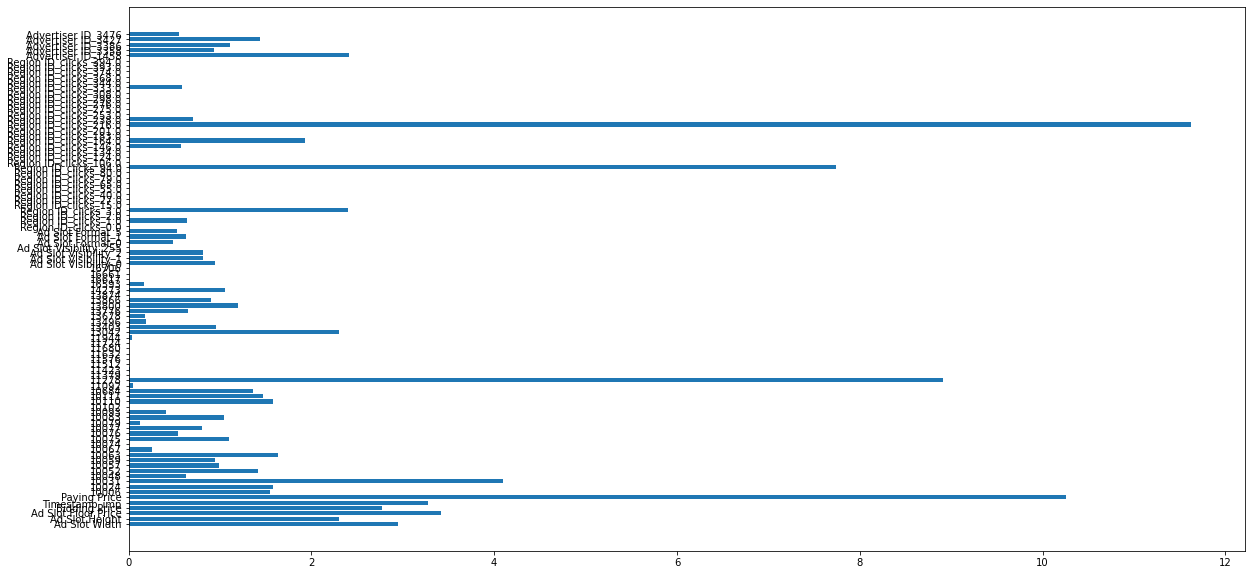

In [65]:
plt.figure(figsize=(20,10))
plt.barh(X1_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()